<a href="https://colab.research.google.com/github/thiviyan98/ThiviyanNanthakumarCE888/blob/master/Assignment_2/Ass2Data1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score , StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from collections import Counter 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##1.Import and Reading Dataset

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/thiviyan98/ThiviyanNanthakumarCE888/master/Assignment1/Data/african-country-recession-dataset-2000-to-2017/africa_recession.csv', sep=',', quotechar='"')

### Printing and getting info for Africa Dataset

In [159]:
df

,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,total,excl_energy,energy,metals_minerals,forestry,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change,growthbucket
0,28.849621,6.914298,0.239667,1.547767,99010.171880,131991.375000,4.265433e+05,0.009374,0.648979,0.626111,95642.992190,131823.703100,7.039534e+05,0.512764,1.068518,1.008857,0.483403,0.119199,0.043679,10.625636,0.307452,0.309123,0.295914,0.618509,0.250884,0.134649,0.121411,-0.182028,0.056574,0.289768,0.314139,0.388684,0.465633,0.481975,0.278865,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
1,45.728313,13.623806,0.297929,2.086037,316862.656300,374842.343800,8.046022e+05,0.019658,0.719390,0.657543,308969.156300,379569.906300,1.669636e+06,0.647240,0.973863,0.865942,0.561062,0.108611,0.042740,6.939828,0.348586,0.354220,0.351310,0.670727,0.147136,0.133380,0.135068,-0.130606,0.044295,0.323617,0.385008,0.474147,0.494095,0.520165,0.444091,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
2,33.262043,13.323813,0.400571,1.498783,29762.876950,36584.992190,6.707259e+04,0.001670,0.308652,0.292607,36392.964840,43032.312500,1.616443e+05,0.399972,0.985717,0.816634,0.506038,0.188336,0.045847,800.408508,0.358321,0.357803,0.351029,0.672994,0.183977,0.129643,0.035281,-0.087737,0.065842,0.368704,0.355546,0.304422,0.501278,0.487623,0.350502,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
3,8.025703,3.869000,0.482076,1.356151,6488.692871,7006.969727,5.790397e+03,0.000184,0.205865,0.234643,7096.825195,7673.087891,1.014219e+04,0.450355,0.703341,0.730731,0.741010,0.080584,0.048116,389.696228,0.281181,0.293343,0.293662,0.869283,0.087738,0.229176,0.024138,-0.017928,-0.192408,0.292345,0.445609,0.238837,0.470837,0.511137,0.402848,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
4,1.061468,0.243000,0.228928,1.676330,7620.187500,8419.264648,1.690724e+04,0.000431,0.959765,0.993985,5540.332520,7002.934570,4.100362e+04,1.068165,0.737721,0.752696,0.612079,0.033991,0.057299,6.939828,0.206353,0.235375,0.222508,0.845482,0.102297,0.130042,0.234137,-0.291400,-0.020558,0.200053,0.512144,0.247313,0.487032,0.482645,0.398468,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,12.208407,6.215000,0.509075,1.837961,21853.750000,26727.062500,5.534759e+04,0.000896,0.234562,0.248461,21976.162110,27719.333980,4.998828e+04,1.923133,1.000826,1.055834,0.741010,0.083527,0.044079,831.530762,0.381079,0.391507,0.377381,0.794133,0.201298,0.108564,0.053728,-0.130483,-0.027240,0.360865,0.438269,0.528944,0.629605,0.600758,0.257941,413.01,343.16,922.01,567.86,417.58,220.62,1262.71,0.162721,0.105791,0.239561,0.078946,0.198187,0.073211,0.026477,0
482,29.784193,15.389316,0.516694,1.467321,94663.101560,138279.359400,1.080252e+06,0.016209,0.337927,0.287038,95187.382810,146607.406300,9.455603e+05,0.736038,1.318056,1.297615,0.342457,0.106177,0.043241,165.915955,0.870157,0.866256,0.809904,0.472643,0.279236,0.133401,0.340749,-0.110697,-0.115332,0.924084,0.857789,0.679089,0.617483,0.668252,0.419288,413.01,343.16,922.01,567.86,417.58,220.62,1262.71,0.162721,0.105791,0.239561,0.078946,0.198187,0.073211,0.026477,1
483,55.797787,25.301973,0.453458,1.689919,102405.859400,137377.593800,7.739462e+05,0.009984,0.259968,0.248847,100627.859400,140040.656300,6.777018e+05,1.760390,0.972671,0.870758

In [160]:
df.info()
#checked if there is missing values from the coloumn
#486 entries lot of data, 50 variable coloumns (features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pop                     486 non-null    float64
 1   emp                     486 non-null    float64
 2   emp_to_pop_ratio        486 non-null    float64
 3   hc                      486 non-null    float64
 4   ccon                    486 non-null    float64
 5   cda                     486 non-null    float64
 6   cn                      486 non-null    float64
 7   ck                      486 non-null    float64
 8   ctfp                    486 non-null    float64
 9   cwtfp                   486 non-null    float64
 10  rconna                  486 non-null    float64
 11  rdana                   486 non-null    float64
 12  rnna                    486 non-null    float64
 13  rkna                    486 non-null    float64
 14  rtfpna                  486 non-null    fl

In [161]:
#Double check if there is missing values
df.isnull().any().sum()>0

False

In [162]:
df['growthbucket'].value_counts() ##finding the target variable 

0    448
1     38
Name: growthbucket, dtype: int64

In [163]:
df.describe()

,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,total,excl_energy,energy,metals_minerals,forestry,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change,growthbucket
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,4.860000e+02,486.000000,486.000000,486.000000,486.000000,486.000000,4.860000e+02,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.00000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,20.185755,7.121089,0.357865,1.777389,64361.006942,80885.988722,2.442244e+05,0.004583,0.454419,0.453431,68169.779343,86894.648830,2.960933e+05,0.922019,0.988884,0.956187,0.513159,0.115962,0.048087,447.069460,0.420510,0.425005,0.411562,0.679354,0.206769,0.174061,0.168543,-0.225677,-0.003049,0.430719,0.474535,0.407058,0.623058,0.592560,0.394489,480.433333,315.391667,1205.33000,512.912222,322.411667,221.326667,1009.445556,0.044535,0.030346,0.082411,0.058144,0.024774,0.033930,0.023741,0.078189
std,30.037490,9.921471,0.080541,0.446339,129634.856793,156740.416624,4.725163e+05,0.008210,0.206562,0.203056,136352.268853,164892.302342,5.126251e+05,0.340277,0.143482,0.140860,0.148923,0.073690,0.012163,797.259327,0.126245,0.117072,0.117266,0.158903,0.088993,0.063082,0.142386,0.132546,0.090130,0.136076,0.142659,0.160308,0.104425,0.076358,0.386874,132.323682,65.322380,416.62894,173.040876,44.315222,49.803981,140.125951,0.184025,0.105616,0.288454,0.151285,0.129924,0.127101,0.076937,0.268746
min,1.061468,0.243000,0.198212,1.069451,2781.259277,2984.366943,5.790397e+03,0.000124,0.098622,0.107790,2786.592285,2978.288574,8.735905e+03,0.136824,0.429515,0.382910,0.164316,0.010000,0.024867,1.000000,0.150231,0.146762,0.128689,0.223663,0.049954,0.016554,0.012206,-0.784460,-0.652756,0.154627,0.030470,0.044227,0.375171,0.432636,0.062744,274.690000,205.270000,586.13000,241.900000,245.560000,149.370000,843.660000,-0.359446,-0.173741,-0.477017,-0.157564,-0.174550,-0.225998,-0.113858,0.000000
25%,3.830730,1.048750,0.297922,1.445886,9117.209716,11081.697755,2.429231e+04,0.000514,0.301179,0.295615,8797.567871,10660.792725,3.465814e+04,0.709967,0.946962,0.900594,0.426136,0.063373,0.041254,8.609180,0.338547,0.349186,0.329368,0.594391,0.142124,0.132076,0.059928,-0.299666,-0.034658,0.346740,0.383279,0.299052,0.536308,0.541171,0.294728,355.210000,271.740000,801.96000,331.440000,289.580000,185.770000,899.190000,-0.058931,-0.044322,-0.102940,-0.053405,-0.060792,-0.026451,-0.020995,0.000000
50%,10.868272,4.184000,0.368841,1.689902,17471.495120,22228.022460,6.432356e+04,0.001355,0.400647,0.405870,16610.300780,21656.230470,7.413105e+04,0.933401,1.000000,0.978814,0.523287,0.107553,0.046315,152.079811,0.409295,0.422608,0.408461,0.708287,0.193263,0.168642,0.136851,-0.186369,0.000000,0.416230,0.471758,0.383152,0.640564,0.607994,0.357652,485.785000,326.945000,1285.16500,562.320000,328.020000,213.095000,948.745000,0.061860,0.019950,0.054933,0.046808,0.003277,0.038444,0.006529,0.000000
75%,24.220695,8.517560,0.416717,2.117452,58016.873047,69676.791020,1.886244e+05,0.003227,0.616736,0.603459,61146.049805,81660.662112,2.488039e+05,1.037367,1.038464,1.015393,0.612079,0.161361,0.052742,550.521500,0.490157,0.489201,0.487113,0.792734,0.268336,0.208797,0.221857,-0.126700,0.041204,0.495139,0.558896,0.497188,0.715812,0.645224,0.433157,611.580000,363.530000,1555.86000,642.820000,348.510000,265.400000,1095.320000,0.208732,0.105791,0.245094,0.154531,0.096810,0.112793,0.047421,0.000000
max,190.886307,65.156548,0.555433,2.885300,758455.187500,896604.8

As you can see from above it shows the max values and this shows that standardisation needs to be applied to some of the features. 

### Preprocessing Data

Transforming the data to centre it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

In [0]:
#x = df[df.columns[:49]] ##Predictors
x=df.drop('growthbucket', axis=1)
y=df.growthbucket ## Target variable

Split data into train and test 

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7, random_state=90)


Applying scale function to perform standardisation

In [0]:
scaler=StandardScaler().fit(x_train)
x_train_norm=scaler.transform(x_train)
x_test_norm=scaler.transform(x_test)

Converting Numpy array to dataframe

In [167]:
x_train.loc[x_train.index,x_train.columns] = x_train_norm

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [168]:

x_train.describe()

,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,total,excl_energy,energy,metals_minerals,forestry,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change
count,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02
mean,-1.075937e-16,-5.191925e-17,-2.898009e-18,3.455365e-16,-2.906172e-17,-2.024524e-17,-8.228712e-17,4.898043e-17,-2.125751e-16,4.151908e-16,-3.363323e-17,1.338798e-17,-6.073573e-17,6.987874e-17,-9.158626e-16,9.916904e-16,8.975663e-17,1.277573e-16,1.426963e-16,4.244970e-18,-2.152690e-16,-1.680845e-16,-3.750166e-16,3.412303e-16,2.586167e-16,1.206551e-16,-5.240906e-17,8.832804e-17,3.167401e-17,-3.110257e-16,3.875985e-16,4.953146e-17,5.374786e-16,2.651474e-16,1.652273e-16,2.631882e-16,-4.741305e-16,6.168269e-16,-2.462083e-16,1.015854e-15,-1.691457e-16,5.647443e-16,3.134747e-17,8.587902e-17,-2.906172e-17,-8.620555e-17,8.310091e-18,3.338832e-17,-2.008198e-17
std,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00
min,-6.304562e-01,-6.824043e-01,-2.004274e+00,-1.580945e+00,-4.852801e-01,-5.084543e-01,-5.131982e-01,-5.664165e-01,-1.598586e+00,-1.683117e+00,-4.926456e-01,-5.232803e-01,-5.843662e-01,-2.424517e+00,-3.873650e+00,-4.018315e+00,-2.389144e+00,-1.373859e+00,-1.889727e+00,-5.443963e-01,-2.183773e+00,-2.382636e+00,-2.400456e+00,-2.896061e+00,-1.740608e+00,-2.433968e+00,-1.089832e+00,-4.250188e+00,-6.793188e+00,-2.096445e+00,-2.969195e+00,-1.814232e+00,-2.336586e+00,-2.111498e+00,-7.525737e-01,-1.530675e+00,-1.631051e+00,-1.470040e+00,-1.508055e+00,-1.731271e+00,-1.398793e+00,-1.182257e+00,-2.273627e+00,-1.998696e+00,-1.978912e+00,-1.442762e+00,-1.542170e+00,-2.138726e+00,-1.822041e+00
25%,-5.464876e-01,-6.002774e-01,-7.401622e-01,-7.325534e-01,-4.382958e-01,-4.585377e-01,-4.748178e-01,-5.170113e-01,-7.664005e-01,-7.864282e-01,-4.509018e-01,-4.787397e-01,-5.391424e-01,-6.357661e-01,-2.857866e-01,-3.914251e-01,-5.928642e-01,-7.567582e-01,-5.184706e-01,-5.352646e-01,-6.299176e-01,-6.709283e-01,-7.110328e-01,-5.641879e-01,-7.421505e-01,-6.603262e-01,-7.407660e-01,-6.111853e-01,-2.987748e-01,-6.400561e-01,-5.989136e-01,-6.518658e-01,-9.384395e-01,-6.773260e-01,-2.488082e-01,-9.231041e-01,-6.246888e-01,-9.514590e-01,-9.964750e-01,-7.347037e-01,-6.712438e-01,-7.800911e-01,-6.088363e-01,-7.528609e-01,-6.766976e-01,-7.732797e-01,-6.561481e-01,-5.149634e-01,-5.951258e-01
50%,-3.295520e-01,-3.013837e-01,1.236428e-01,-2.251319e-01,-3.742036e-01,-3.883208e-01,-3.844973e-01,-4.112684e-01,-2.590502e-01,-2.320290e-01,-3.954752e-01,-4.137928e-01,-4.604226e-01,5.141096e-02,6.264843e-02,1.865114e-01,6.141704e-02,-1.040998e-01,-1.633098e-01,-3.873859e-01,-8.751268e-0

In [169]:
x_test.loc[x_test.index,x_test.columns] = x_test_norm



/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [170]:
x_test.describe()

,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,total,excl_energy,energy,metals_minerals,forestry,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,-0.155846,-0.151079,0.075402,0.070737,-0.087918,-0.078983,-0.044714,-0.028412,-0.035588,-0.020138,-0.120150,-0.109800,-0.116902,0.167067,-0.046767,-0.043427,0.013902,0.017188,0.066719,-0.033587,0.178840,0.170015,0.186374,0.013861,0.138260,-0.036419,0.047272,-0.086348,-0.077513,0.172339,0.073683,0.068935,0.192341,0.197007,-0.086738,0.072501,0.120507,0.059021,0.134328,0.028532,0.131316,0.061299,-0.118700,-0.113433,-0.104732,-0.187409,0.034278,-0.078666,-0.013572
std,0.669915,0.680651,1.071640,1.031846,0.878010,0.912314,0.966822,1.087999,0.975187,0.949575,0.822870,0.866727,0.925596,1.255464,0.965405,0.945180,1.070854,0.855150,0.999756,0.839478,1.134047,1.068679,1.048475,1.062370,1.083249,0.896748,1.029190,1.127399,0.775309,1.176375,0.860401,0.926133,1.015930,1.104864,0.225601,0.992979,0.957342,1.002275,0.954902,1.010549,0.978553,1.047541,1.059007,1.050511,1.010001,0.890555,1.038972,1.108467,1.054099
min,-0.630107,-0.682034,-1.984931,-1.538689,-0.483340,-0.507088,-0.511699,-0.566175,-1.720724,-1.636570,-0.490346,-0.520746,-0.580731,-2.454439,-3.366490,-3.832407,-2.389144,-1.373859,-1.745794,-0.544396,-1.851317,-1.796829,-1.751749,-2.918251,-1.769121,-1.999867,-1.093718,-4.412377,-3.631006,-1.856866,-2.626562,-2.195114,-2.303928,-2.043922,-0.655618,-1.530675,-1.631051,-1.470040,-1.508055,-1.731271,-1.398793,-1.182257,-2.273627,-1.998696,-1.978912,-1.442762,-1.542170,-2.138726,-1.822041
25%,-0.545074,-0.610951,-0.721517,-0.729003,-0.437384,-0.455934,-0.472921,-0.517604,-0.742484,-0.705218,-0.450380,-0.476674,-0.533403,-0.484348,-0.334176,-0.404812,-0.667894,-0.588892,-0.578546,-0.535404,-0.529191,-0.509066,-0.576862,-0.475025,-0.602775,-0.613682,-0.805110,-0.589328,-0.435741,-0.508377,-0.568112,-0.581106,-0.505409,-0.523548,-0.234782,-0.923104,-0.510381,-0.951459,-0.735200,-0.734704,-0.632268,-0.780091,-0.799090,-0.942581,-0.727762,-1.075185,-0.656148,-0.777314,-0.595126
50%,-0.353064,-0.332317,0.227578,-0.039694,-0.382747,-0.392197,-0.405410,-0.416344,-0.291012,-0.255139,-0.398269,-0.414998,-0.457376,0.144432,0.012528,0.035476,0.099499,-0.104286,-0.043088,-0.304487,0.009253,0.138070,0.179160,0.181185,-0.072393,-0.106887,-0.188363,0.179221,0.008485,-0.032069,0.053123,-0.066076,0.366940,0.416198,-0.101961,-0.092032,0.280992,-0.024413,0.359150,0.188061,0.025324,-0.397190,0.039691,-0.209568,-0.153358,-0.335731,-0.002527,-0.071802,-0.217653
75%,0.044080,0.034103,0.762326,0.762742,-0.116551,-0.157916,-0.237099,-0.281066,0.724802,0.637340,-0.130981,-0.126302,-0.255908,0.513654,0.245629,0.383111,0.682840,0.641461,0.622500,0.087191,0.727730,0.729458,0.771041,0.800304,0.692067,0.377640,0.534566,0.706671,0.372311,0.633078,0.662312,0.665566,0.945550,0.887288,0.046755,1.011360,0.765021,0.859960,0.782572,0.599411,0.920369,0.640345,0.873955,0.645929,0.534860,0.563229,0.571361,0.618099,0.308782
max,4.307860,4.106890,2.252460,2.470138,4.332024,4.246073,5.124399,4.625322,2.323033,2.516193,4.123570,4.093089,4.145495,6.786725,6.664689,3.418088,2.014664,3.025290,3.700148,4.663876,4.260246,3.773529,3.045816,1.695230,4.046827,2.317881,3.797

###Checking the imbalance

The distributions shows how skewed these features are.

####Bar Graph for distribution

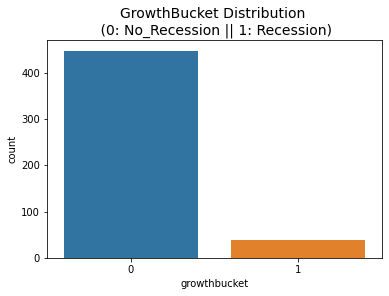

In [171]:
plt.title('GrowthBucket Distribution \n (0: No_Recession || 1: Recession)', fontsize=14)
sns.countplot(y,data=df)


####Pie Chart Representing Percentage of Imbalance

In [172]:
recession= len(df[df['growthbucket']==1])
no_recession=len(df[df['growthbucket']==0])

percentofrecession= recession/(recession+no_recession)
percentofnorecession= no_recession/(recession+no_recession)

print("Percentage of Recession is", percentofrecession*100)
print("Percentage of No Recession is", percentofnorecession*100)

Percentage of Recession is 7.818930041152264
Percentage of No Recession is 92.18106995884774


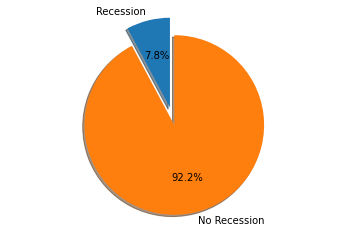

In [173]:
labels = 'Recession','No Recession'

sizes=[percentofrecession,percentofnorecession]

explode=(0.2,0)

fig1, ax1 =plt.subplots()

ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%', shadow= True, startangle=90)

ax1.axis('equal')

plt.show()

In [0]:
#function to plot distribution

def hist(data):
  y=data.values
  sns.distplot(y,kde=False,rug=True)


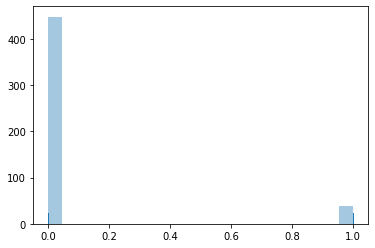

In [175]:
# histogram of the distribution of recession and no recession
hist(df[['growthbucket']])

###Inspection of Dataset for some features

In [0]:
##Distribution of the population of the countries to employment ratio on the train and test data

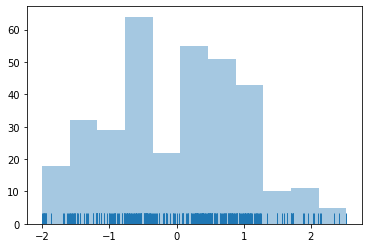

In [177]:
#train data
hist(x_train['emp_to_pop_ratio'])

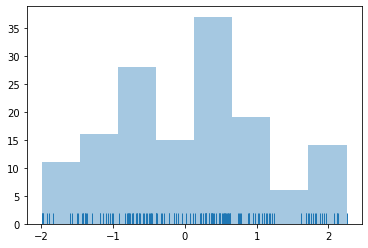

In [178]:
#test data 
hist(x_test['emp_to_pop_ratio'])

In [0]:
#using the total feature, this will show the distribution of the Total annual Bank of Canada commodity price index for the train and test data

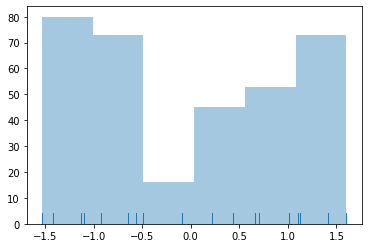

In [180]:
#train data
hist(x_train['total'])

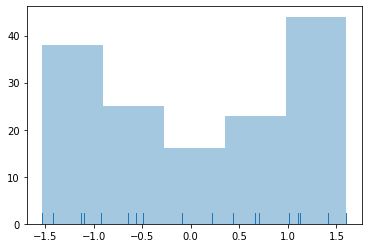

In [181]:
#test data 
hist(x_test['total'])

In [0]:
#using the total feature, this will show the distribution of the year on year percentage change annual Bank of Canada commodity price index- Fish for the train and test data

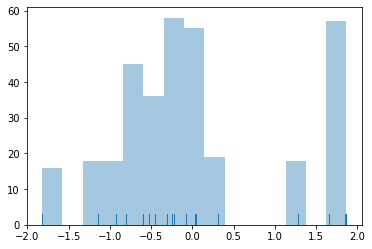

In [183]:
#train data
hist(x_train['fish_change'])

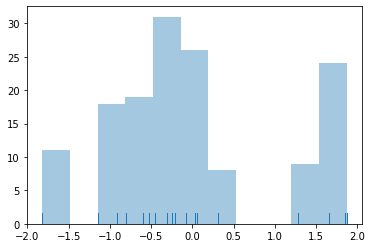

In [184]:
#test data 
hist(x_test['fish_change'])

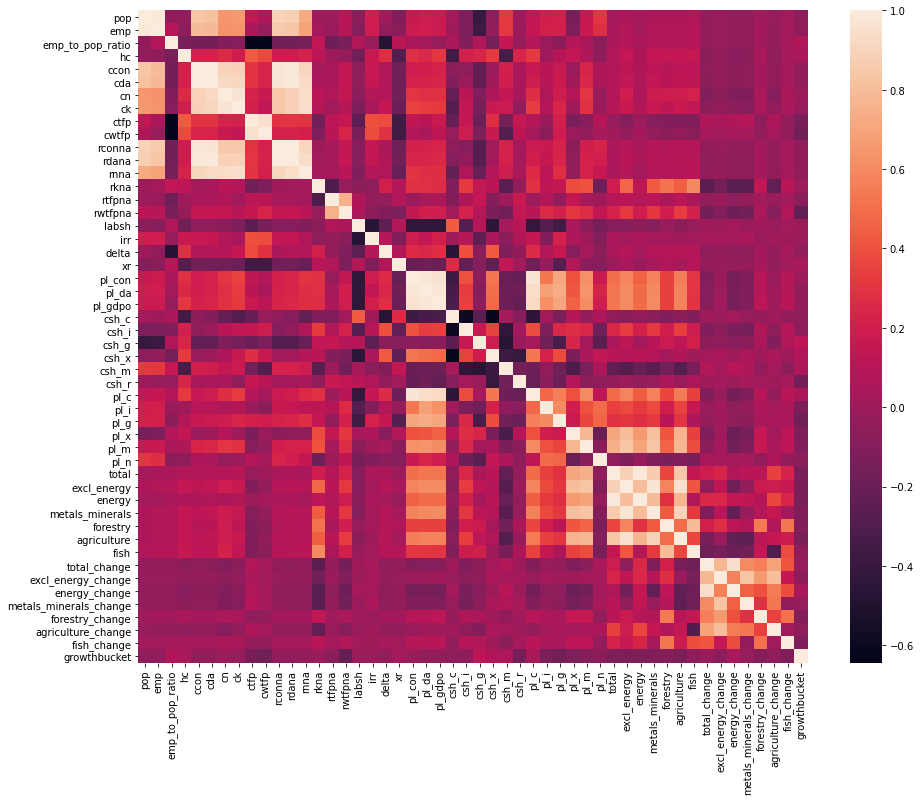

In [185]:
#Heatmap shows the correlation between each feature
plt.figure(figsize=(15,12))
sns.heatmap(data=df.corr())

##2.To establish a baseline, perform cross-validation on your dataset using a decision tree and a random forest.

In [0]:
def boxplot(a,b,c,d):
  dfa=pd.DataFrame(a,columns=['Acc_scores'])
  dfa['Pre_scores']=b
  dfa['Rec_scores']=c
  dfa['F1_scores']=d
  plt.figure(6)
  boxplot = dfa.boxplot(column=['Acc_scores','Pre_scores','Rec_scores','F1_scores'])

In [0]:
#Function to establish a baseline and find average and accuracy 
def baseline(model,x,y):
  Acc_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(accuracy_score)) #calculates accuracy 
  Pre_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(precision_score)) #calculates precision
  Rec_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(recall_score)) #calculates Recall
  F1_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(f1_score)) #calculates F1
  print("Accuracy:", Acc_scores)
  print("Precision:", Pre_scores)
  print("Recall:", Rec_scores)
  print("F1 Score:", F1_scores)
  #Averages of the scores printed out
  print("Average Accuracy: %0.2f (+/- %0.2f)" % (Acc_scores.mean(), Acc_scores.std() * 2))
  print("Average Precision: %0.2f (+/- %0.2f)" % (Pre_scores.mean(), Pre_scores.std() * 2))
  print("Average Recall: %0.2f (+/- %0.2f)" % (Rec_scores.mean(), Rec_scores.std() * 2))
  print("Average F1 Score: %0.2f (+/- %0.2f)" % (F1_scores.mean(), F1_scores.std() * 2))
  boxplot(Acc_scores, Pre_scores,Rec_scores,F1_scores)
  


In [0]:
x=df.drop('growthbucket', axis=1) ##Predictors
y=df.growthbucket ## Target variable

Accuracy: [0.06122449 0.42857143 0.89795918 0.91836735 0.91836735 0.79591837
 0.41666667 0.91666667 0.41666667 0.8125    ]
Precision: [0.0625     0.         0.33333333 0.5        0.5        0.125
 0.03703704 0.         0.07142857 0.        ]
Recall: [0.75       0.         0.25       0.5        0.75       0.25
 0.33333333 0.         0.5        0.        ]
F1 Score: [0.11538462 0.         0.28571429 0.5        0.6        0.16666667
 0.06666667 0.         0.125      0.        ]
Average Accuracy: 0.66 (+/- 0.58)
Average Precision: 0.16 (+/- 0.39)
Average Recall: 0.33 (+/- 0.55)
Average F1 Score: 0.19 (+/- 0.40)


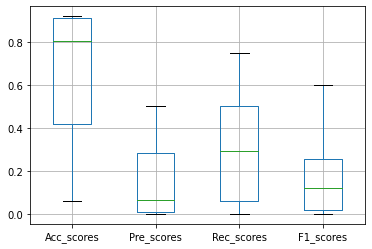

In [189]:
#Using the Decision Tree to perform cross validation
decclf = DecisionTreeClassifier(random_state=0)
baseline(decclf,x,y)

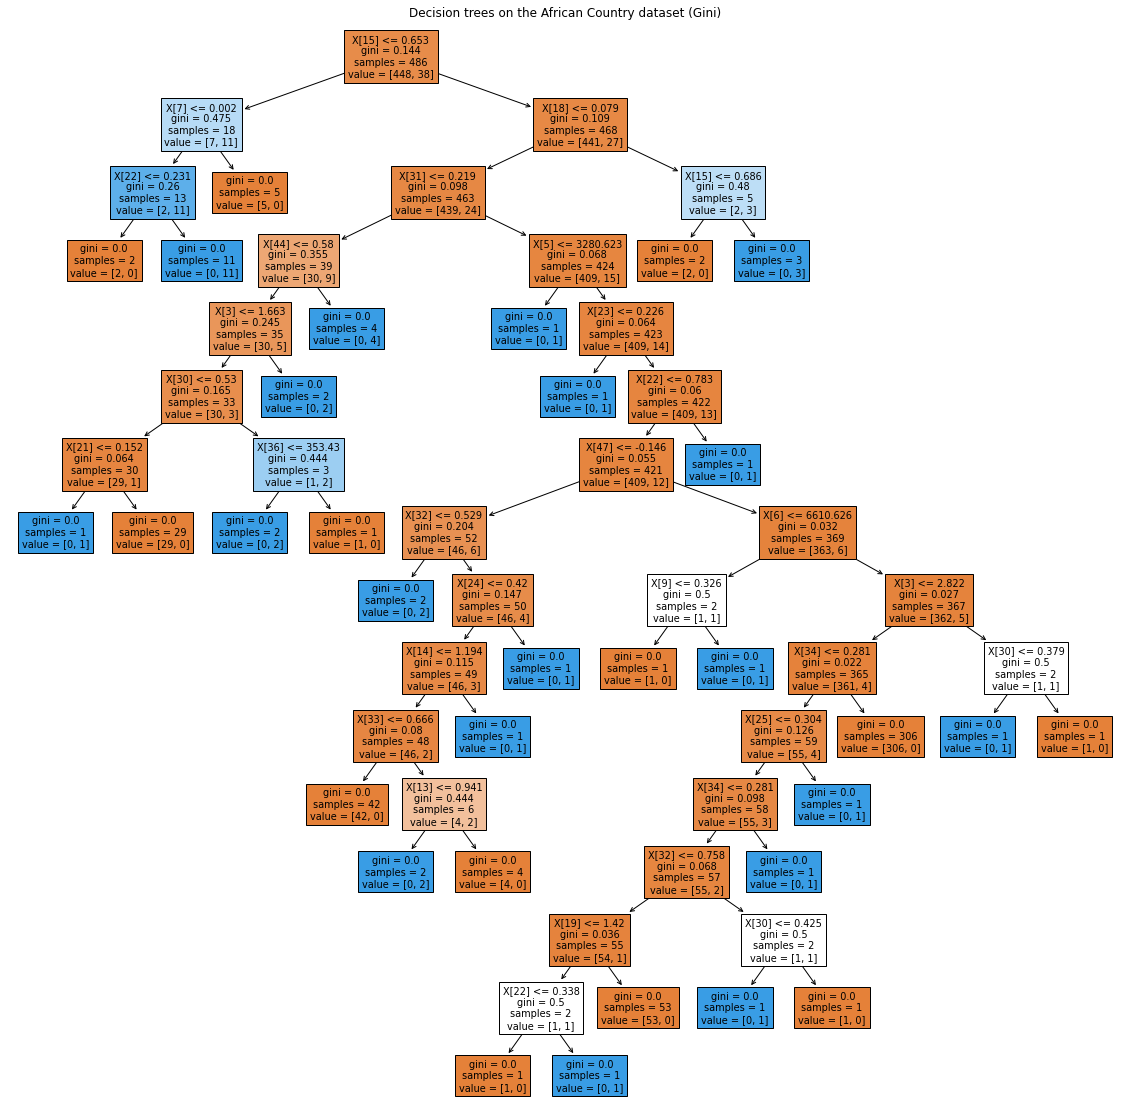

In [190]:
# Decision Tree graph
plt.figure(figsize=(20,20))
plottree=plot_tree(decclf.fit(x, y),filled=True)
plt.title("Decision trees on the African Country dataset (Gini)")
plt.show()


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: [0.48979592 0.42857143 0.89795918 0.93877551 0.97959184 0.93877551
 0.70833333 0.9375     0.89583333 0.91666667]
Precision: [0.14814815 0.         0.         1.         0.75       1.
 0.06666667 0.         0.         0.        ]
Recall: [1.   0.   0.   0.25 0.75 0.25 0.   0.   0.   0.  ]
F1 Score: [0.31578947 0.         0.         0.4        0.85714286 0.4
 0.         0.         0.         0.        ]
Average Accuracy: 0.81 (+/- 0.38)
Average Precision: 0.30 (+/- 0.83)
Average Recall: 0.23 (+/- 0.69)
Average F1 Score: 0.20 (+/- 0.55)


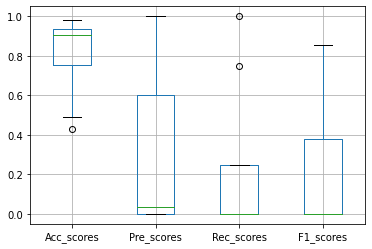

In [191]:
#Performing random forest classifier cross validation 
RFC=RandomForestClassifier()
baseline(RFC,x,y)

##3. Partition each of the datasets into 10 bins, keeping the imbalance ratio from the original dataset using stratified cross-validation 


###Performing Stratified CV to show the ratios and shape of each permutations array 

In [192]:
skf = StratifiedKFold(n_splits=10,shuffle=False,random_state=None)

#enumerate the splits and summerise the distributions
for train_index, test_index in skf.split(x, y):
  
  #selects rows
  xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
  ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
  
  #summarising the train and test composition
  train_0, train_1 = len(ytrain[ytrain==0]), len(ytrain[ytrain==1])
  test_0, test_1 = len(ytest[ytest==0]), len(ytest[ytest==1])
  print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
  ##printing shape to see if the fold ratio is 9:1 which in this case it is roughly.
  print(xtrain.shape)
  print(xtest.shape)
  

>Train: 0=403, 1=34, Test: 0=45, 1=4
(437, 49)
(49, 49)
>Train: 0=403, 1=34, Test: 0=45, 1=4
(437, 49)
(49, 49)
>Train: 0=403, 1=34, Test: 0=45, 1=4
(437, 49)
(49, 49)
>Train: 0=403, 1=34, Test: 0=45, 1=4
(437, 49)
(49, 49)
>Train: 0=403, 1=34, Test: 0=45, 1=4
(437, 49)
(49, 49)
>Train: 0=403, 1=34, Test: 0=45, 1=4
(437, 49)
(49, 49)
>Train: 0=403, 1=35, Test: 0=45, 1=3
(438, 49)
(48, 49)
>Train: 0=403, 1=35, Test: 0=45, 1=3
(438, 49)
(48, 49)
>Train: 0=404, 1=34, Test: 0=44, 1=4
(438, 49)
(48, 49)
>Train: 0=404, 1=34, Test: 0=44, 1=4
(438, 49)
(48, 49)


###Checking Imbalance Ratio and Graph for one of the permutations 

####Training Data

Percentage of Recession is 7.76255707762557
Percentage of No Recession is 92.23744292237443


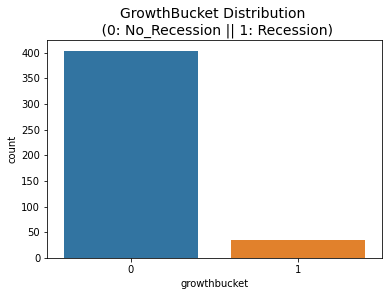

In [193]:
recession= len(ytrain[ytrain==1])
no_recession=len(ytrain[ytrain==0])

percentofrecession= recession/(recession+no_recession)
percentofnorecession= no_recession/(recession+no_recession)

print("Percentage of Recession is", percentofrecession*100)
print("Percentage of No Recession is", percentofnorecession*100)

plt.title('GrowthBucket Distribution \n (0: No_Recession || 1: Recession)', fontsize=14)
sns.countplot(ytrain,data=xtrain)


####Test Data

Percentage of Recession is 8.333333333333332
Percentage of No Recession is 91.66666666666666


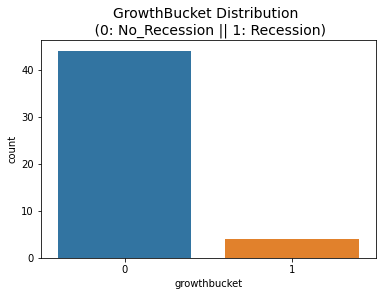

In [194]:
recession= len(ytest[ytest==1])
no_recession=len(ytest[ytest==0])

percentofrecession= recession/(recession+no_recession)
percentofnorecession= no_recession/(recession+no_recession)

print("Percentage of Recession is", percentofrecession*100)
print("Percentage of No Recession is", percentofnorecession*100)

plt.title('GrowthBucket Distribution \n (0: No_Recession || 1: Recession)', fontsize=14)
sns.countplot(ytest,data=xtest)

Both sets of training and test data have similar/same unbalanced ratio. Therefore, SKF has worked. Step has been completed.

##Steps 4 - 8

In [0]:
#Elbow method function
def elbow():
  Sum_of_squared_distances = []
  K = range(1,30)
  for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(xtrain)
    Sum_of_squared_distances.append(km.inertia_)
  plt.figure(1)
  plt.plot(K, Sum_of_squared_distances, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Sum_of_squared_distances')
  plt.title('Elbow Method For Optimal k')
  plt.show()

In [0]:
def silhoutte():
  sil=[]
  k_sil= range(2,10)

  for k_s in k_sil:
    print(k_sil,end=' ')
    kmeans= KMeans(n_clusters=k_s)
    kmeans=kmeans.fit(xtrain)
    labels=kmeans.labels_
    sil.append(silhouette_score(xtrain,labels,metric='euclidean')) 
  plt.figure(2)
  plt.plot(k_sil,sil, 'bx-')
  plt.xlabel('k')
  plt.ylabel('silhouette_score')
  plt.title('Silhoutte Method for Optimal k')
  plt.show

               Start                  




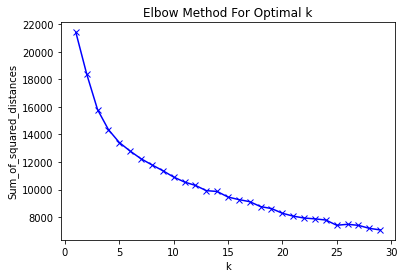

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 3 1 1 1
 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 4 1 1 1 4 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 4 1 3 4 1 1 1 1
 1 1 1 1 1 1 4 1 3 1 1 4 1 1 1 1 1 1 4 1 1 4 1 1 1 4 3 2 2 2 2 2 2 2 4 3 2
 3 2 2 2 2 2 2 4 2 2 2 2 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 4 2 2 2 2 3
 2 2 4 2 2 4 2 3 2 4 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 3 0 0 0 0 3 4
 4 2 3 3 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 4 2 2 2 2 2 2 4 2 2 2 2 2 2 4 2
 2 2 2 4 2 2 3 2 2 2 2 2 4 3 2 2 2 2 2 2 2 4 2 4 2 4 2 3 2 2 2 2 2 2 2 2 2
 4 3 2 2 4 2 2 2 4 3 2 2 4 2 2 2 2 4 2 2 4 2 4 2 2 2 4 2 2 2 3 2 2 4 2 2 2
 4 3 4 2 4 2 2 2 2 2 2 2 2 2 4 2 3 2 2 2 2 4 2 0 0 0 4 3 0 0 0 0 3 0 0 0 0
 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 4 0 0 4 0 0 0 0 0 0 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

Accuracy: [1.  1.  1.  1.  1.  0.6 0.6 0.8 0.8 1. ]
Precision: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Recall: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
F1 Score: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Average Accuracy: 0.88 (+/- 0.32)
Average Precision: 0.00 (+/- 0.00)
Average Recall: 0.00 (+/- 0.00)
Average F1 Score: 0.00 (+/- 0.00)


               Start                  




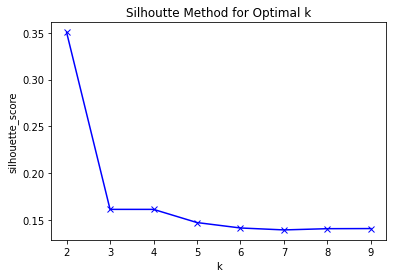

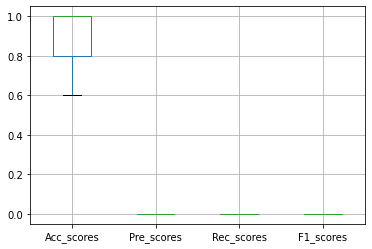

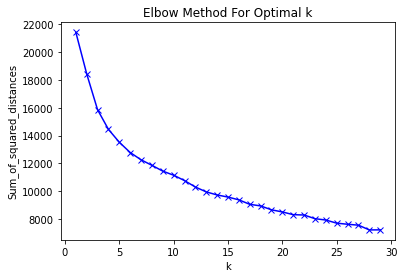

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 2 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 2 1 3 2 1 1 1 1
 1 1 1 1 1 1 2 1 3 1 1 2 1 0 1 1 1 1 2 1 1 2 1 1 1 2 3 0 0 0 0 0 0 0 2 3 0
 3 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 3
 0 0 2 0 0 2 0 3 0 2 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 3 4 4 4 4 3 2
 2 0 3 3 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0
 0 0 0 2 0 0 3 0 0 0 0 0 2 3 0 0 0 0 0 0 0 2 0 2 0 2 0 3 0 0 0 0 0 0 0 0 0
 2 3 0 0 2 0 0 0 2 3 0 0 0 0 0 0 0 2 0 0 2 0 2 0 0 0 2 0 0 0 3 0 0 2 0 0 0
 2 3 2 0 2 0 0 0 0 0 0 0 0 0 2 0 3 0 0 0 0 2 0 4 4 4 2 3 4 4 4 4 3 4 4 4 4
 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 2 4 4 2 4 4 4 4 4 4 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

Accuracy: [1.  0.8 1.  0.8 1.  1.  1.  1.  1.  1. ]
Precision: [1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
Recall: [1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
F1 Score: [1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Average Accuracy: 0.96 (+/- 0.16)
Average Precision: 0.30 (+/- 0.92)
Average Recall: 0.20 (+/- 0.80)
Average F1 Score: 0.20 (+/- 0.80)


               Start                  




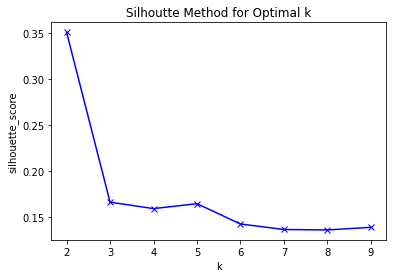

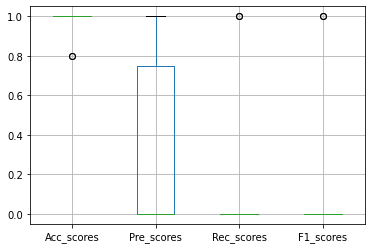

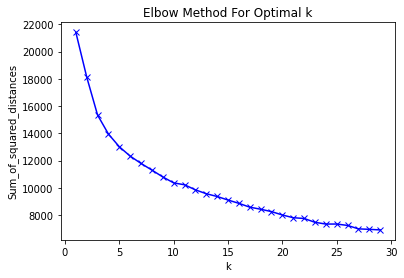

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3
 3 3 3 3 2 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 2 4 3 1 1 1
 3 3 1 1 1 1 4 1 2 1 1 4 1 1 1 1 1 1 4 1 1 4 1 1 1 4 2 1 1 1 1 1 1 1 4 2 1
 2 1 1 1 1 1 1 4 1 1 1 1 1 1 1 4 1 1 4 1 1 1 1 1 1 1 1 4 1 1 1 4 4 1 1 1 2
 1 1 4 1 1 4 1 2 1 4 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 2 0 0 0 0 2 4
 4 1 2 2 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 4 1 1 1 1 1 1 4 1 1 1 1 1 1 4 1
 1 1 1 4 1 1 2 1 1 1 1 1 4 2 1 1 1 1 1 4 1 4 1 4 1 4 1 2 1 1 1 1 1 1 1 1 1
 4 2 1 1 4 1 1 1 4 2 1 1 4 1 1 1 1 4 1 1 4 1 4 1 1 1 4 1 1 1 2 1 1 4 1 1 1
 4 2 4 1 4 1 1 1 1 1 1 1 1 1 4 1 2 1 1 1 1 4 1 0 0 0 4 2 0 0 0 0 2 0 0 0 0
 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 4 0 0 0 4 0 0 4 0 0 0 0 0 0 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

Accuracy: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Precision: [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
Recall: [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
F1 Score: [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
Average Accuracy: 1.00 (+/- 0.00)
Average Precision: 0.40 (+/- 0.98)
Average Recall: 0.40 (+/- 0.98)
Average F1 Score: 0.40 (+/- 0.98)


               Start                  




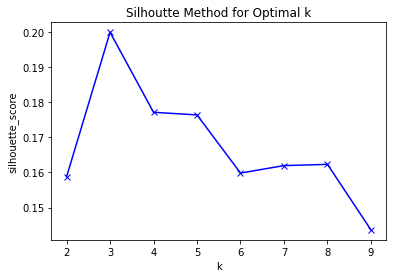

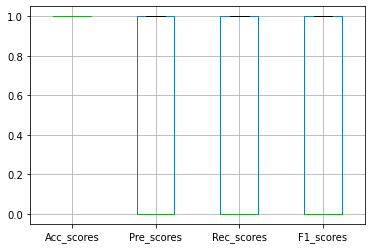

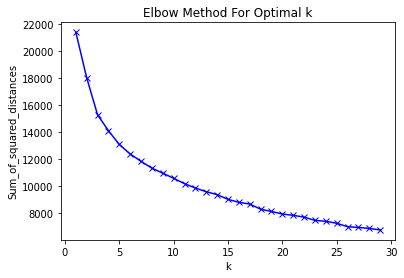

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 1 3 3 3 3 3 1 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3
 3 4 3 3 3 4 3 3 4 3 3 3 3 3 3 3 3 3 3 3 4 3 3 2 4 3 3 3 3 2 2 3 3 3 1 4 2
 4 4 2 2 2 2 2 4 2 2 2 2 2 2 2 4 2 2 4 2 2 2 2 2 4 2 2 4 2 2 2 4 4 2 2 2 1
 2 2 4 2 2 4 4 1 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 4
 4 2 1 1 2 2 2 2 4 2 4 2 2 2 4 2 2 2 2 2 2 4 4 2 2 2 2 2 4 4 2 2 2 4 2 4 2
 4 2 2 4 2 2 1 2 2 2 2 2 4 1 2 4 2 2 2 4 2 4 4 4 2 4 2 1 2 2 2 4 2 2 2 4 2
 4 1 4 2 4 2 2 4 4 1 2 2 4 2 2 4 2 4 2 2 4 4 4 4 2 2 4 2 2 2 1 2 2 4 2 2 2
 4 1 4 2 4 2 2 2 4 2 4 2 2 2 4 4 1 4 2 2 2 4 2 0 0 0 4 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 4 0 0 4 0 0 0 0 0 0 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

Accuracy: [1.  1.  1.  0.8 1.  1.  1.  1.  1.  1. ]
Precision: [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
Recall: [1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
F1 Score: [1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
Average Accuracy: 0.98 (+/- 0.12)
Average Precision: 0.20 (+/- 0.80)
Average Recall: 0.30 (+/- 0.92)
Average F1 Score: 0.30 (+/- 0.92)


               Start                  




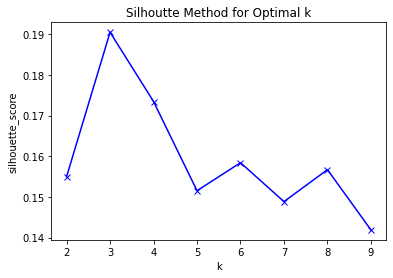

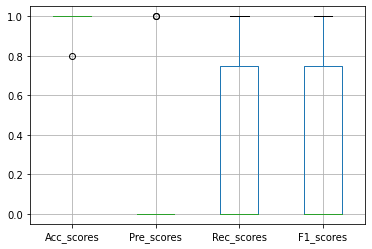

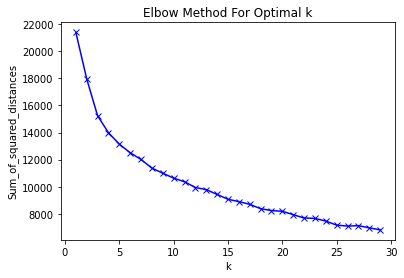

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 3 4 4 4 4 4 3 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 2 4 4 4 2 4 4 4 4 4 2 2 2
 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 3 2 2 1 2 3 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 3 2
 2 2 2 1 2 2 1 3 2 3 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3 1
 1 2 3 3 2 2 2 1 2 2 1 2 2 2 1 1 1 2 2 2 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 3 1 1 1 1 1 1 3 2 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1
 1 3 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1
 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 0 0 0 0 3 0 0 0 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

Accuracy: [1.  0.8 1.  0.8 1.  1.  1.  1.  1.  1. ]
Precision: [1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Recall: [1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
F1 Score: [1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Average Accuracy: 0.96 (+/- 0.16)
Average Precision: 0.20 (+/- 0.80)
Average Recall: 0.20 (+/- 0.80)
Average F1 Score: 0.20 (+/- 0.80)


               Start                  




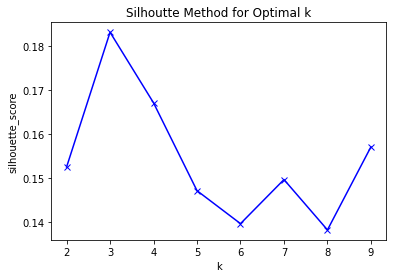

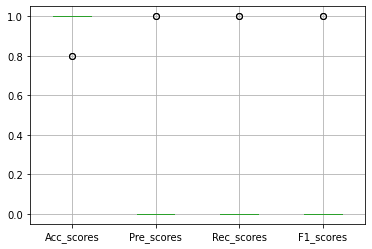

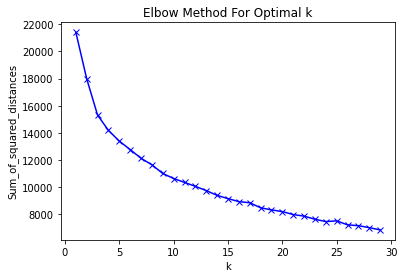

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [2 2 2 2 2 2 2 3 2 3 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 3 4 2 2 2 2 2 4 2 2 2 3 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 4 4 1 1 1 3 1 2 1 2 2 3 2 2 2 1 2 1 2 2 1 1 2 1 2 1 1 3 2 1 2 2 1 1 2 2
 1 4 1 2 3 2 4 1 2 2 1 1 2 2 1 1 1 1 3 1 4 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1
 3 4 1 1 1 1 1 1 1 1 4 1 4 1 1 1 1 1 1 3 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 3 1 1 1 1 4 1 1 1 1 1 1 4 1 3 0 0 0 0 4 1 1 1 3 1 1 1 1 1 1 1 1
 1 1 1 3 1 1 4 1 1 1 1 1 1 4 1 1 0 0 0 0 0 0 0 3 0 0 0 4 0 0 0 0 0 0 0 0 0
 0 4 0 0 3 0 0 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 4 0 0 0 0 0 0
 0 4 0 0 3 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 3 0 0 0 0 3 4 0 0 0 0 4 0 0 0 0
 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

Accuracy: [0.8 0.8 0.8 0.8 1.  1.  1.  1.  1.  1. ]
Precision: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Recall: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
F1 Score: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Average Accuracy: 0.92 (+/- 0.20)
Average Precision: 0.00 (+/- 0.00)
Average Recall: 0.00 (+/- 0.00)
Average F1 Score: 0.00 (+/- 0.00)


               Start                  




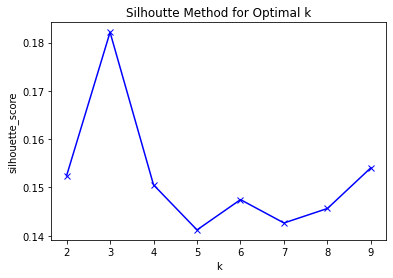

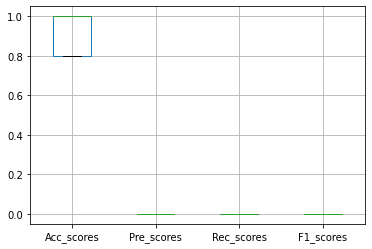

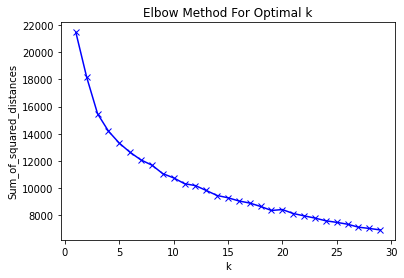

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4
 4 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 0 4 4 1 4 0 1 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4
 4 0 4 4 4 4 1 4 4 1 0 4 0 4 4 4 4 4 4 1 4 4 1 4 4 4 4 1 4 4 1 1 4 1 1 1 1
 4 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 0 3 3 3 1 1 4 0 0 4 4 4 1 4 4 1 4 4 4 1 1 1 4 4 4 4 1 1 1 4 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 3 3 3 3 0 3 3 3 3 0 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

Accuracy: [0.8 1.  0.8 1.  1.  1.  1.  1.  1.  1. ]
Precision: [1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Recall: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
F1 Score: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Average Accuracy: 0.96 (+/- 0.16)
Average Precision: 0.20 (+/- 0.80)
Average Recall: 0.10 (+/- 0.60)
Average F1 Score: 0.00 (+/- 0.00)


               Start                  




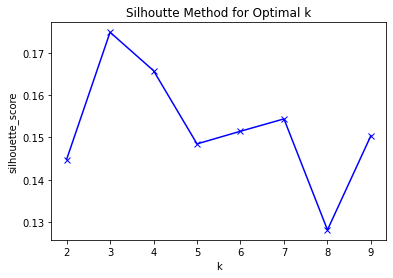

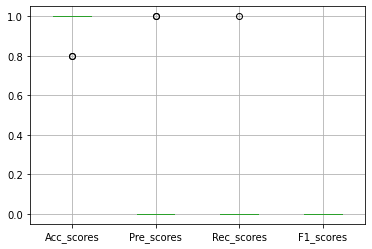

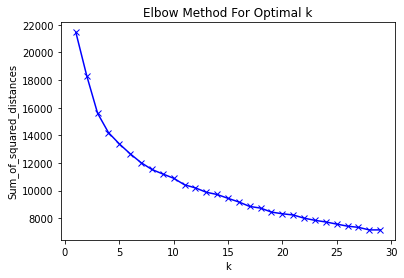

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 2 4 4 4 4 4 2 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0
 0 2 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 1 0 2 1 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 2 1 0 1 0 1 1 0 1 2 1 2 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 2 3 3 3 3 2 1 1 1 2 2 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 3 3 3 2 3 3 3 3 2 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

Accuracy: [0.8  0.8  0.8  1.   1.   1.   1.   1.   1.   0.75]
Precision: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Recall: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
F1 Score: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Average Accuracy: 0.92 (+/- 0.21)
Average Precision: 0.00 (+/- 0.00)
Average Recall: 0.00 (+/- 0.00)
Average F1 Score: 0.00 (+/- 0.00)


               Start                  




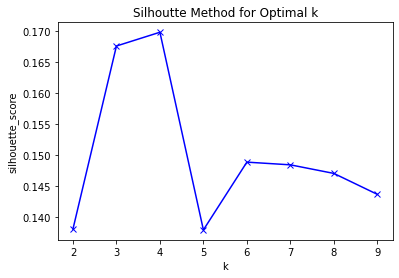

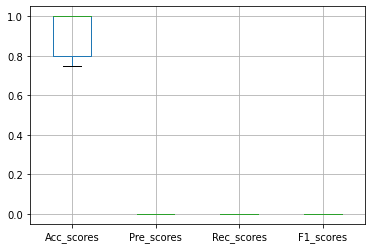

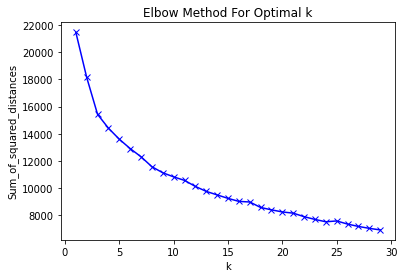

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [1 4 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 4 1 1 1 1 1 4 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 4 4 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 3 3 0 1 1 1 1 3 3 1 1
 1 4 3 1 0 1 4 0 1 1 3 1 1 1 3 3 3 3 0 3 4 3 3 0 1 3 3 3 3 3 0 3 3 0 3 3 3
 0 4 3 3 3 3 3 3 3 0 4 3 4 3 3 3 3 3 3 0 3 3 3 3 3 3 3 0 3 3 0 3 3 3 3 3 3
 3 3 0 3 3 3 0 3 3 3 3 4 3 3 0 3 3 0 3 4 3 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 4 2 2 2 2 4 0 0 3 4 4 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 0 3 3 3
 3 3 3 0 3 3 3 3 3 3 0 3 3 3 3 0 3 3 4 3 3 3 3 3 0 4 3 3 3 3 3 3 3 0 3 0 3
 0 3 4 3 3 3 3 3 3 3 3 3 0 4 3 3 0 3 3 3 0 4 3 3 0 3 3 3 3 0 3 3 0 3 0 3 3
 3 0 3 3 3 4 3 3 0 3 3 3 0 4 0 3 0 3 3 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

Accuracy: [1.   0.8  1.   1.   0.8  0.8  1.   0.8  1.   0.75]
Precision: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Recall: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
F1 Score: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Average Accuracy: 0.89 (+/- 0.21)
Average Precision: 0.10 (+/- 0.60)
Average Recall: 0.00 (+/- 0.00)
Average F1 Score: 0.00 (+/- 0.00)


               Start                  




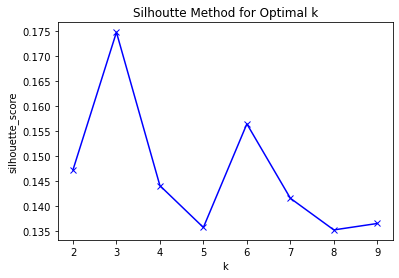

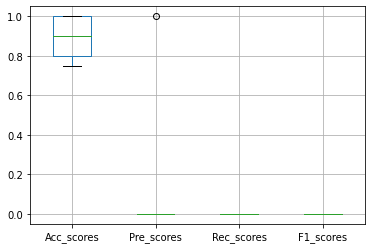

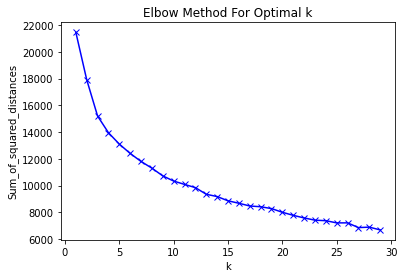

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 3 1 1 1 3 1 1 1 1 1 3 3 3
 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 2 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3
 3 2 3 3 3 3 0 3 3 0 2 3 2 3 3 3 3 3 3 0 3 3 0 3 3 3 3 0 3 0 0 0 3 0 0 0 0
 3 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 2 4 4 4 4 2 0 0 3 2 2 3 3 3 0 3 0 0 0 3 3 0 0 0 3 3 3 0 0 0 0 0
 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 3 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 4 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

Accuracy: [1.  1.  1.  1.  0.8 0.8 0.6 0.8 1.  1. ]
Precision: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Recall: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
F1 Score: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Average Accuracy: 0.90 (+/- 0.27)
Average Precision: 0.00 (+/- 0.00)
Average Recall: 0.00 (+/- 0.00)
Average F1 Score: 0.00 (+/- 0.00)




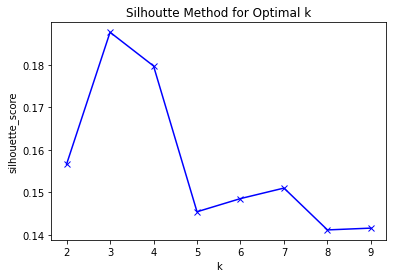

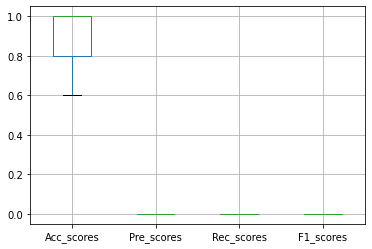

In [200]:
#enumerate the splits and summerise the distributions
for train_index, test_index in skf.split(x, y):
  
  #selects rows
  xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
  ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    
  std_scaled=StandardScaler().fit(xtrain)
  xtrain=std_scaled.transform(xtrain)
  xtest=std_scaled.transform(xtest)

  print('               Start                  ')
  print('\n')
  #calling elbow and silhoutte method
  elbow()
  silhoutte()

  #after using elbow and silhouette number of clusters that have been decided is 3- 6  but 5 will be used for the train set.
  #run kmeans
  numk=5
  #model created using kmeans object and fitting kmeans object to dataset
  kmeans=KMeans(n_clusters=numk)
  kmeans = kmeans.fit(xtrain)

  y_train_clusters = kmeans.predict(xtrain)
  print('\n')
  print('            ytrain Data             ')
  print('\n')
  #Predict the closest cluster each sample in X belongs to.
  print('Closest Clusters Train Labels \n', y_train_clusters)
  

  #gets each clusters centroid points
  centroids=kmeans.cluster_centers_
  print('centroids \n', centroids)
  print('\n')
  #5 clusters in 49 dimensions
  print('cluster center shape \n',kmeans.cluster_centers_.shape)
  print('\n')
  
  #append the cluster labels into dataframe to visualise better
  df0=pd.DataFrame(data=xtrain)
  df0['clusters']=y_train_clusters
  
  #prints the clusters labels in lowest to highest order for each iteration
  print('\n')
  print('clusters \n',df0.clusters.unique())
  #prints out the number of samples of the minority class in that cluster
  print('\n')
  print('number of samples for each cluster \n', Counter(y_train_clusters))

  #Assigning xtest samples to its closest cluster
  y_test_clusters =  kmeans.predict(xtest)

  df1=pd.DataFrame(data=xtest)
  df1['clusters']=y_test_clusters

  print('\n')
  print('            ytest Data              ')
  print('\n')
  #Predict the closest cluster each sample in X belongs to.
  print('Closest Clusters Test Labels \n', y_test_clusters)
  RFC=RandomForestClassifier()
  print('\n')
  baseline(RFC,df1,ytest)
  print('\n')
